<a href="https://colab.research.google.com/github/Colsai/Covid-Visualizations-And-Trends/blob/main/Covid_Social_Mobility_update.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Short Notebook: Coronavirus Social Mobility Score
What is the mobility score currently for people in the United States? Despite the high cases, are people following the lockdown, or not?

In [76]:
#Datetime To Convert Dates
from datetime import datetime

#Import Packages for Data
import pandas as pd
import numpy as np
import scipy as sci
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
import statistics

In [77]:
#Seaborn/Matplotlib basic stats
sns.set(style="ticks")
plt.style.use('seaborn-white')

Using data from Descrateslabs Dataset

In [78]:
#Descartes Labs- Mobility Data
site = 'https://raw.githubusercontent.com/descarteslabs/DL-COVID-19/master/DL-us-m50.csv'
df = pd.read_csv(site)

In [79]:
#Head of the data set
df.head()

,country_code,admin_level,admin1,admin2,fips,2020-03-01,2020-03-02,2020-03-03,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09,2020-03-10,2020-03-11,2020-03-12,2020-03-13,2020-03-14,2020-03-15,2020-03-16,2020-03-17,2020-03-18,2020-03-19,2020-03-20,2020-03-21,2020-03-22,2020-03-23,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02,2020-04-03,2020-04-04,...,2020-10-21,2020-10-22,2020-10-23,2020-10-24,2020-10-25,2020-10-26,2020-10-27,2020-10-28,2020-10-29,2020-10-30,2020-10-31,2020-11-01,2020-11-02,2020-11-03,2020-11-04,2020-11-05,2020-11-06,2020-11-07,2020-11-08,2020-11-09,2020-11-10,2020-11-11,2020-11-12,2020-11-13,2020-11-14,2020-11-15,2020-11-16,2020-11-17,2020-11-18,2020-11-19,2020-11-20,2020-11-21,2020-11-22,2020-11-23,2020-11-24,2020-11-25,2020-11-26,2020-11-27,2020-11-28,2020-11-29
0,US,1,Alabama,NaN,1.0,8.331,10.398,10.538,10.144,10.982,13.024,11.373,8.513,10.901,10.892,10.954,11.755,12.269,9.379,6.384,9.490,8.263,7.662,7.863,8.325,5.233,2.903,5.398,5.519,6.305,6.363,6.956,4.772,2.739,5.148,4.490,5.619,5.876,6.624,4.241,...,9.980,9.908,11.684,8.053,6.684,8.868,9.398,8.766,9.253,11.410,8.896,6.870,8.917,9.278,10.071,9.666,11.000,9.240,6.882,8.321,9.877,9.089,9.488,11.288,9.730,6.958,8.688,9.370,10.306,10.695,11.892,9.853,7.514,9.253,10.294,9.864,6.114,8.273,7.160,5.223
1,US,2,Alabama,Autauga County,1001.0,7.194,14.587,13.865,13.880,14.659,17.066,11.562,8.510,15.882,14.429,14.484,15.707,15.103,8.297,5.488,11.726,10.317,9.624,8.482,9.838,4.694,2.271,6.438,7.030,6.912,6.731,7.601,4.540,2.633,5.896,5.196,6.278,6.230,7.470,4.006,...,11.757,11.570,13.286,6.866,5.692,9.670,11.121,11.131,9.503,13.419,8.362,6.555,10.455,11.010,12.833,13.433,15.168,8.325,6.251,9.831,12.809,10.958,11.216,13.127,9.087,5.939,9.618,12.572,13.906,14.860,15.327,10.046,6.858,11.082,13.125,10.897,5.980,7.041,6.975,4.468
2,US,2,Alabama,Baldwin County,1003.0,9.780,12.042,11.481,10.879,12.381,13.789,11.481,9.971,11.566,11.936,12.102,12.588,13.547,10.871,9.601,9.538,8.747,8.510,8.580,11.389,6.710,4.281,6.645,6.422,6.630,6.618,7.402,5.500,3.148,5.241,4.999,6.054,5.954,6.758,4.392,...,10.370,10.370,11.964,9.052,8.372,9.642,9.926,7.776,8.138,11.214,8.854,7.114,9.492,9.476,10.773,10.372,10.924,10.025,8.603,8.875,10.650,10.150,9.966,11.922,9.654,8.621,9.285,9.494,10.732,11.266,12.166,9.895,7.953,9.729,10.492,10.264,4.851,8.681,8.314,6.200
3,US,2,Alabama,Barbour County,1005.0,8.348,10.004,9.267,6.517,8.247,11.002,13.146,7.382,9.166,8.668,9.596,11.567,11.258,9.522,5.416,9.632,8.556,7.252,7.009,7.459,6.228,3.624,6.060,6.743,6.645,7.015,7.994,5.284,4.850,6.412,5.479,5.840,5.495,6.155,5.184,...,8.550,9.178,12.187,7.230,6.634,8.180,8.858,8.504,8.386,13.138,8.410,5.980,9.754,8.644,8.255,8.920,10.372,8.006,6.834,7.487,8.587,7.835,8.456,10.458,9.815,7.011,8.324,8.062,9.422,9.681,13.157,9.128,7.325,8.762,9.851,10.030,4.789,8.895,7.042,6.310
4,US,2,Alabama,Bibb County,1007.0,13.008,23.076,24.164,22.768,26.944,32.374,27.175,12.452,29.973,24.206,27.877,26.126,29.176,17.004,13.342,16.496,17.370,19.282,18.225,18.496,6.752,3.581,8.878,12.335,13.569,11.518,13.157,8.580,4.140,10.346,9.363,10.754,10.873,14.236,7.384,...,15.967,19.658,20.764,10.264,8.629,15.642,17.376,15.075,15.272,20.899,13.873,10.613,12.624,14.800,15.509,15.935,21.178,17.072,7.701,13.311,18.842,16.343,15.032,20.906,16.113,10.162,15.468,16.844,17.496,17.328,26.392,16.463,10.120,16.685,19.460,16.436,9.067,12.980,12.810,7.174


In [80]:
#End of the Data Set
df.tail()

,country_code,admin_level,admin1,admin2,fips,2020-03-01,2020-03-02,2020-03-03,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09,2020-03-10,2020-03-11,2020-03-12,2020-03-13,2020-03-14,2020-03-15,2020-03-16,2020-03-17,2020-03-18,2020-03-19,2020-03-20,2020-03-21,2020-03-22,2020-03-23,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02,2020-04-03,2020-04-04,...,2020-10-21,2020-10-22,2020-10-23,2020-10-24,2020-10-25,2020-10-26,2020-10-27,2020-10-28,2020-10-29,2020-10-30,2020-10-31,2020-11-01,2020-11-02,2020-11-03,2020-11-04,2020-11-05,2020-11-06,2020-11-07,2020-11-08,2020-11-09,2020-11-10,2020-11-11,2020-11-12,2020-11-13,2020-11-14,2020-11-15,2020-11-16,2020-11-17,2020-11-18,2020-11-19,2020-11-20,2020-11-21,2020-11-22,2020-11-23,2020-11-24,2020-11-25,2020-11-26,2020-11-27,2020-11-28,2020-11-29
2717,US,2,Wyoming,Sheridan County,56033.0,2.122,3.116,3.308,3.475,3.806,3.809,2.764,2.486,3.245,3.535,3.630,3.033,3.689,2.666,1.502,2.924,2.671,2.561,2.404,2.638,1.193,0.129,2.271,2.459,2.354,2.350,2.570,0.956,0.919,2.656,1.940,1.337,2.136,2.208,1.294,...,3.020,2.418,3.268,0.740,0.473,2.807,2.992,3.114,3.164,2.981,2.419,1.273,2.804,3.018,3.030,3.223,2.843,2.408,0.873,2.406,3.086,2.979,2.877,2.813,1.676,1.705,2.522,3.002,3.154,3.276,3.272,2.140,1.377,2.639,3.181,2.733,0.441,2.101,1.976,1.866
2718,US,2,Wyoming,Sublette County,56035.0,0.857,3.604,3.625,4.022,6.674,5.150,5.630,2.535,5.688,3.947,5.366,4.409,6.203,2.672,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.816,0.886,0.953,1.227,0.844,0.219,0.042,1.014,0.482,1.273,0.348,0.307,0.140,...,6.916,7.466,11.514,7.150,1.388,2.754,4.453,4.039,6.201,5.278,5.127,0.730,2.514,3.883,3.014,6.106,3.052,3.161,1.047,2.454,5.308,2.820,2.459,4.176,1.660,0.788,1.840,3.330,4.952,8.012,8.078,6.750,1.996,2.350,9.176,8.095,0.227,1.119,2.359,1.205
2719,US,2,Wyoming,Sweetwater County,56037.0,1.780,3.069,3.351,3.450,4.696,5.742,3.542,2.554,3.740,4.054,4.389,5.010,4.790,4.019,3.329,4.150,4.152,4.082,3.500,2.961,2.738,2.098,3.708,3.632,3.082,3.011,3.302,1.901,1.712,2.817,3.352,3.160,2.656,3.242,2.088,...,4.302,4.198,4.799,3.349,0.558,3.281,3.801,3.973,4.326,3.963,3.421,2.048,3.419,3.578,4.103,3.604,3.815,2.755,1.435,2.602,4.209,3.138,4.157,3.529,1.773,1.588,2.891,3.684,3.435,4.742,4.240,3.811,2.384,3.036,3.232,3.023,1.279,1.953,2.480,1.825
2720,US,2,Wyoming,Teton County,56039.0,8.747,6.298,5.952,6.210,5.961,7.800,8.503,9.067,6.773,6.760,7.446,7.861,8.596,4.978,4.256,5.144,4.361,2.564,3.872,3.139,1.356,0.712,1.649,1.260,0.889,1.917,1.682,0.292,0.086,1.504,0.438,1.134,0.774,0.890,0.940,...,10.452,10.451,20.358,6.760,2.997,7.583,9.087,9.468,8.078,9.846,6.869,6.022,5.657,7.134,5.947,8.149,7.069,7.316,4.235,4.503,6.523,3.736,5.737,5.156,3.498,1.908,3.760,4.377,5.599,5.892,6.628,6.627,3.132,4.694,7.298,5.849,1.968,7.423,10.009,4.206
2721,US,2,Wyoming,Uinta County,56041.0,1.993,2.943,2.745,4.529,3.131,4.474,4.652,2.312,3.675,3.887,4.402,4.233,5.904,2.475,2.741,3.299,3.074,3.154,3.299,3.684,4.907,5.363,3.615,3.217,3.017,3.122,2.790,2.892,2.369,2.886,2.840,2.983,3.308,3.633,2.153,...,5.101,3.726,6.034,4.358,1.019,2.874,5.044,4.575,7.600,4.565,5.178,2.339,3.930,3.586,4.847,4.532,5.163,3.055,2.318,3.309,3.933,4.349,4.148,4.900,2.076,2.560,3.204,3.681,4.215,5.682,4.662,4.228,2.543,3.630,3.268,4.434,2.392,3.171,2.696,2.520


In [81]:
#sample 1
df.sample(1)

,country_code,admin_level,admin1,admin2,fips,2020-03-01,2020-03-02,2020-03-03,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09,2020-03-10,2020-03-11,2020-03-12,2020-03-13,2020-03-14,2020-03-15,2020-03-16,2020-03-17,2020-03-18,2020-03-19,2020-03-20,2020-03-21,2020-03-22,2020-03-23,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02,2020-04-03,2020-04-04,...,2020-10-21,2020-10-22,2020-10-23,2020-10-24,2020-10-25,2020-10-26,2020-10-27,2020-10-28,2020-10-29,2020-10-30,2020-10-31,2020-11-01,2020-11-02,2020-11-03,2020-11-04,2020-11-05,2020-11-06,2020-11-07,2020-11-08,2020-11-09,2020-11-10,2020-11-11,2020-11-12,2020-11-13,2020-11-14,2020-11-15,2020-11-16,2020-11-17,2020-11-18,2020-11-19,2020-11-20,2020-11-21,2020-11-22,2020-11-23,2020-11-24,2020-11-25,2020-11-26,2020-11-27,2020-11-28,2020-11-29
1137,US,2,Michigan,Gratiot County,26057.0,4.059,8.373,7.047,6.902,8.168,11.628,11.268,4.45,7.368,6.513,10.034,8.773,7.383,3.009,2.875,5.7,3.943,3.953,3.077,4.091,1.676,0.53,3.041,0.316,0.776,0.293,0.928,0.041,0.038,0.113,0.1,0.132,1.208,1.449,0.046,...,7.528,7.509,9.65,6.633,3.634,6.267,6.574,8.834,7.203,11.771,6.475,1.684,5.412,5.744,10.55,4.862,6.412,6.299,2.718,5.372,6.419,4.448,4.05,6.574,4.664,1.985,4.985,5.389,5.955,5.291,9.246,5.242,3.633,5.998,4.584,6.7,1.57,5.136,3.513,3.018


A lot of stuff. Really, we are just looking for one thing.  
We are looking for the average score in the United States. Since all of our stats on the covid cases/deaths notebooks are primarily focused on countrywide numbers, let's just try to aggregate all the countrywide mobility stats.

In [82]:
#Let's aggregate the data first, so we can look at it as a country whole
agg_df =  (df.groupby("admin1", as_index = False).agg('mean'))

In [83]:
#Here's the state look at mobility, per day
agg_df.head()

,admin1,admin_level,fips,2020-03-01,2020-03-02,2020-03-03,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09,2020-03-10,2020-03-11,2020-03-12,2020-03-13,2020-03-14,2020-03-15,2020-03-16,2020-03-17,2020-03-18,2020-03-19,2020-03-20,2020-03-21,2020-03-22,2020-03-23,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02,2020-04-03,2020-04-04,2020-04-05,2020-04-06,...,2020-10-21,2020-10-22,2020-10-23,2020-10-24,2020-10-25,2020-10-26,2020-10-27,2020-10-28,2020-10-29,2020-10-30,2020-10-31,2020-11-01,2020-11-02,2020-11-03,2020-11-04,2020-11-05,2020-11-06,2020-11-07,2020-11-08,2020-11-09,2020-11-10,2020-11-11,2020-11-12,2020-11-13,2020-11-14,2020-11-15,2020-11-16,2020-11-17,2020-11-18,2020-11-19,2020-11-20,2020-11-21,2020-11-22,2020-11-23,2020-11-24,2020-11-25,2020-11-26,2020-11-27,2020-11-28,2020-11-29
0,Alabama,1.985294,1051.323529,10.871941,14.345132,14.244603,13.083015,14.815029,17.943985,16.303191,10.940368,14.744824,14.350324,14.575529,16.140824,17.056328,12.913045,8.772603,12.795731,11.745191,11.067582,11.490191,11.857851,7.481164,4.730088,7.930794,8.310279,9.693279,9.700309,10.092750,6.675662,4.432221,7.447559,6.608588,8.525250,8.172603,9.236618,5.802059,2.269985,6.749221,...,13.650103,13.445676,15.861500,10.941103,8.864647,11.932191,12.742368,11.821926,12.506956,15.972868,11.983603,9.056735,12.150103,12.649897,13.523971,12.599574,15.125221,12.703868,8.633765,11.159897,13.106074,12.410309,12.737529,15.613868,13.217750,9.336985,11.906515,12.849559,14.198191,14.518059,16.385956,13.095147,9.601191,12.944309,13.963750,13.304926,7.591882,11.244456,9.428147,7.551765
1,Alaska,1.875000,1853.625000,0.864143,3.127000,3.515571,3.244750,3.271500,4.196571,2.055714,0.794429,2.636571,3.219857,3.417857,3.478000,3.638857,1.481000,0.682429,2.755286,2.375714,1.640429,1.242714,1.623000,0.047857,0.065000,0.514714,0.418857,0.448143,0.464500,0.686429,0.060857,0.047500,0.066375,0.253625,0.131375,0.159000,0.544625,0.193375,0.047625,0.249714,...,3.511375,3.767125,3.865500,3.000750,1.182875,2.971500,3.488500,3.386875,3.070250,3.182000,2.621625,0.642875,2.467250,2.860250,3.147750,3.184125,2.737125,2.057875,0.587250,2.553500,3.092375,2.478750,2.713875,3.140875,2.166625,1.223875,2.412875,2.370375,2.799750,2.722500,3.339714,2.227429,1.105875,2.596250,2.740125,3.051750,0.392625,1.778250,1.583500,1.018875
2,Arizona,1.937500,3763.250000,3.702000,5.356867,5.440200,5.410750,5.790562,7.026600,5.423000,3.859933,5.487933,6.023600,5.668187,5.009063,8.227438,5.126933,4.876867,4.947600,4.467933,3.296067,3.009200,4.333867,2.181933,1.075067,1.979133,2.171562,2.256067,1.928688,1.917333,1.150933,0.590812,1.429000,1.578125,1.175937,1.322313,1.979067,0.777000,0.510733,1.130200,...,4.455500,5.443500,6.201750,4.284000,2.773063,3.499625,4.189062,4.282750,4.836250,5.175625,3.692125,2.235125,3.426312,3.782500,3.869313,3.713500,4.217000,2.984812,1.821250,2.820187,4.347375,4.095687,3.980812,4.418125,3.596750,2.442937,3.247062,3.508375,4.328938,4.493062,4.979000,3.805188,2.339000,3.709375,3.974062,5.051812,1.017625,2.481875,3.225000,2.343813
3,Arkansas,1.986301,5006.397260,8.344141,12.619333,12.986658,12.312444,13.862863,16.397662,14.978562,9.208959,11.611986,12.596534,12.233070,13.314083,13.428384,9.575347,6.305972,9.731431,9.481041,8.467548,8.913528,9.988211,6.341574,2.295557,7.042889,6.724000,8.055528,8.626722,8.658425,4.350151,4.990027,5.960575,6.473361,7.909151,7.620425,7.362959,3.662817,3.396986,6.804653,...,11.370616,11.693027,13.709575,10.539890,7.077589,9.714932,10.324986,10.011274,11.389753,13.392068,10.141178,6.525137,9.836479,10.511288,11.362425,10.937808,12.602000,9.787247,7.612041,9.532342,11.257753,11.011493,11.091452,12.932904,8.237863,7.580411,9.362041,10.376164,11.661000,12.319699,13.755603,10.755342,7.749658,10.570247,11.274384,11.310110,6.014507,9.317027,9.312301,6.256315
4,California,1.981818,5947.672727,9.722800,6.367167,6.404185,6.464345,6.893909,7.470037,5.184327,4.892927,6.083537,6.519500,

In [84]:
agg_df2 = agg_df.drop(columns=['fips', 'admin_level'])
#agg_df2 = agg_df2.agg('mean')

In [85]:
agg_df2.head()

,admin1,2020-03-01,2020-03-02,2020-03-03,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09,2020-03-10,2020-03-11,2020-03-12,2020-03-13,2020-03-14,2020-03-15,2020-03-16,2020-03-17,2020-03-18,2020-03-19,2020-03-20,2020-03-21,2020-03-22,2020-03-23,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02,2020-04-03,2020-04-04,2020-04-05,2020-04-06,2020-04-07,2020-04-08,...,2020-10-21,2020-10-22,2020-10-23,2020-10-24,2020-10-25,2020-10-26,2020-10-27,2020-10-28,2020-10-29,2020-10-30,2020-10-31,2020-11-01,2020-11-02,2020-11-03,2020-11-04,2020-11-05,2020-11-06,2020-11-07,2020-11-08,2020-11-09,2020-11-10,2020-11-11,2020-11-12,2020-11-13,2020-11-14,2020-11-15,2020-11-16,2020-11-17,2020-11-18,2020-11-19,2020-11-20,2020-11-21,2020-11-22,2020-11-23,2020-11-24,2020-11-25,2020-11-26,2020-11-27,2020-11-28,2020-11-29
0,Alabama,10.871941,14.345132,14.244603,13.083015,14.815029,17.943985,16.303191,10.940368,14.744824,14.350324,14.575529,16.140824,17.056328,12.913045,8.772603,12.795731,11.745191,11.067582,11.490191,11.857851,7.481164,4.730088,7.930794,8.310279,9.693279,9.700309,10.092750,6.675662,4.432221,7.447559,6.608588,8.525250,8.172603,9.236618,5.802059,2.269985,6.749221,6.364500,6.983088,...,13.650103,13.445676,15.861500,10.941103,8.864647,11.932191,12.742368,11.821926,12.506956,15.972868,11.983603,9.056735,12.150103,12.649897,13.523971,12.599574,15.125221,12.703868,8.633765,11.159897,13.106074,12.410309,12.737529,15.613868,13.217750,9.336985,11.906515,12.849559,14.198191,14.518059,16.385956,13.095147,9.601191,12.944309,13.963750,13.304926,7.591882,11.244456,9.428147,7.551765
1,Alaska,0.864143,3.127000,3.515571,3.244750,3.271500,4.196571,2.055714,0.794429,2.636571,3.219857,3.417857,3.478000,3.638857,1.481000,0.682429,2.755286,2.375714,1.640429,1.242714,1.623000,0.047857,0.065000,0.514714,0.418857,0.448143,0.464500,0.686429,0.060857,0.047500,0.066375,0.253625,0.131375,0.159000,0.544625,0.193375,0.047625,0.249714,0.231857,0.403429,...,3.511375,3.767125,3.865500,3.000750,1.182875,2.971500,3.488500,3.386875,3.070250,3.182000,2.621625,0.642875,2.467250,2.860250,3.147750,3.184125,2.737125,2.057875,0.587250,2.553500,3.092375,2.478750,2.713875,3.140875,2.166625,1.223875,2.412875,2.370375,2.799750,2.722500,3.339714,2.227429,1.105875,2.596250,2.740125,3.051750,0.392625,1.778250,1.583500,1.018875
2,Arizona,3.702000,5.356867,5.440200,5.410750,5.790562,7.026600,5.423000,3.859933,5.487933,6.023600,5.668187,5.009063,8.227438,5.126933,4.876867,4.947600,4.467933,3.296067,3.009200,4.333867,2.181933,1.075067,1.979133,2.171562,2.256067,1.928688,1.917333,1.150933,0.590812,1.429000,1.578125,1.175937,1.322313,1.979067,0.777000,0.510733,1.130200,1.281125,1.069467,...,4.455500,5.443500,6.201750,4.284000,2.773063,3.499625,4.189062,4.282750,4.836250,5.175625,3.692125,2.235125,3.426312,3.782500,3.869313,3.713500,4.217000,2.984812,1.821250,2.820187,4.347375,4.095687,3.980812,4.418125,3.596750,2.442937,3.247062,3.508375,4.328938,4.493062,4.979000,3.805188,2.339000,3.709375,3.974062,5.051812,1.017625,2.481875,3.225000,2.343813
3,Arkansas,8.344141,12.619333,12.986658,12.312444,13.862863,16.397662,14.978562,9.208959,11.611986,12.596534,12.233070,13.314083,13.428384,9.575347,6.305972,9.731431,9.481041,8.467548,8.913528,9.988211,6.341574,2.295557,7.042889,6.724000,8.055528,8.626722,8.658425,4.350151,4.990027,5.960575,6.473361,7.909151,7.620425,7.362959,3.662817,3.396986,6.804653,6.607111,7.374437,...,11.370616,11.693027,13.709575,10.539890,7.077589,9.714932,10.324986,10.011274,11.389753,13.392068,10.141178,6.525137,9.836479,10.511288,11.362425,10.937808,12.602000,9.787247,7.612041,9.532342,11.257753,11.011493,11.091452,12.932904,8.237863,7.580411,9.362041,10.376164,11.661000,12.319699,13.755603,10.755342,7.749658,10.570247,11.274384,11.310110,6.014507,9.317027,9.312301,6.256315
4,California,9.722800,6.367167,6.404185,6.464345,6.893909,7.470037,5.184327,4.892927,6.083537,6.519500,6.359000,6.307127,6.503926,3

In [86]:
agg_df2.tail()

,admin1,2020-03-01,2020-03-02,2020-03-03,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09,2020-03-10,2020-03-11,2020-03-12,2020-03-13,2020-03-14,2020-03-15,2020-03-16,2020-03-17,2020-03-18,2020-03-19,2020-03-20,2020-03-21,2020-03-22,2020-03-23,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02,2020-04-03,2020-04-04,2020-04-05,2020-04-06,2020-04-07,2020-04-08,...,2020-10-21,2020-10-22,2020-10-23,2020-10-24,2020-10-25,2020-10-26,2020-10-27,2020-10-28,2020-10-29,2020-10-30,2020-10-31,2020-11-01,2020-11-02,2020-11-03,2020-11-04,2020-11-05,2020-11-06,2020-11-07,2020-11-08,2020-11-09,2020-11-10,2020-11-11,2020-11-12,2020-11-13,2020-11-14,2020-11-15,2020-11-16,2020-11-17,2020-11-18,2020-11-19,2020-11-20,2020-11-21,2020-11-22,2020-11-23,2020-11-24,2020-11-25,2020-11-26,2020-11-27,2020-11-28,2020-11-29
46,Washington,2.503500,4.746576,4.794706,5.064676,5.364576,5.691303,3.497000,2.460294,4.553294,4.822879,4.675939,4.855118,4.901515,1.863882,1.248971,3.720485,2.734441,2.604853,2.237500,3.012706,0.670273,0.244971,1.452971,0.948471,0.715794,0.427529,0.480500,0.109706,0.036500,0.228029,0.447471,0.443647,0.480382,0.716147,0.138324,0.040676,0.622676,0.670706,0.736412,...,4.161676,4.752588,4.588559,3.319382,2.126559,3.582824,4.204088,3.889529,4.358765,4.701029,3.415118,1.605941,3.284971,3.425882,3.796618,3.384824,4.022000,2.795235,1.637559,3.060618,4.017676,3.915676,3.387824,3.681500,2.552088,1.613824,2.873588,3.011853,3.377706,3.680794,4.138912,2.610353,1.092647,2.932294,3.216265,3.963853,0.296059,1.704382,2.018324,1.237618
47,"Washington, D.C.",3.739000,2.798000,3.583000,3.656000,3.902000,4.268000,3.966000,4.506000,3.377000,3.519000,3.623000,3.729000,4.044000,3.163000,1.112000,1.293000,0.456000,0.349000,0.200000,0.403000,0.043000,0.035000,0.027000,0.031000,0.025000,0.033000,0.045000,0.022000,0.023000,0.031000,0.025000,0.023000,0.032000,0.035000,0.023000,0.024000,0.027000,0.025000,0.025000,...,2.002000,1.994000,2.625000,2.629000,0.846000,0.987000,0.901000,0.962000,0.533000,2.098000,1.686000,0.597000,0.727000,1.134000,1.210000,0.971000,1.184000,1.496000,1.551000,0.899000,1.547000,0.921000,0.666000,1.782000,2.221000,1.810000,1.130000,1.166000,1.332000,1.415000,2.254000,2.131000,1.521000,1.244000,1.200000,1.792000,0.644000,0.625000,0.828000,0.598000
48,West Virginia,9.029419,7.717933,8.610378,8.058156,8.738250,9.051465,6.960614,8.014227,8.155488,7.946867,8.157622,8.229356,8.946929,5.421465,8.070488,7.018762,5.809093,5.250721,5.233209,5.342476,1.851952,0.905186,2.830262,2.423488,1.546930,2.620930,2.448465,1.663116,0.902233,2.033651,1.586349,1.529186,2.316977,2.925070,1.624744,0.701581,2.406977,1.819326,1.976767,...,7.247156,6.908000,8.451311,5.482089,3.328911,6.017578,5.993133,6.275067,5.748000,7.255756,5.187111,2.625067,5.564711,5.904600,6.377311,5.764933,6.420644,5.246933,4.304089,5.605711,6.989533,5.325978,5.700356,6.719644,5.093489,2.999022,5.267978,5.391667,6.211133,6.803289,7.378622,5.851311,3.517261,5.376422,5.325756,5.535311,2.435500,4.422326,4.812326,3.453913
49,Wisconsin,5.034866,7.497354,7.612985,7.565910,7.935299,9.621394,6.996448,5.027956,6.968559,7.365636,7.620692,7.914761,8.613530,4.669328,2.674530,6.174000,5.235348,3.523333,3.057318,3.822806,0.621576,0.181866,2.657059,1.644676,1.129603,1.161426,1.755821,0.087368,0.042426,1.132868,1.151235,1.494147,1.637824,1.672059,0.363765,0.213971,1.319412,1.578956,1.361897,...,6.428765,5.925309,8.098618,5.717059,2.794853,5.511485,6.018265,6.103338,6.702750,7.979721,5.130779,2.101838,5.445544,5.998868,6.783971,5.555868,6.777250,5.321412,4.443853,4.674485,5.803191,5.938559,5.394147,6.962721,4.894353,2.305765,4.552382,5.458985,6.616515,6.917353,7.911691,4.616059,4.045559,6.067485,5.229235,6.372662,1.624044,5.212309,5.314809,3.305176
50,Wyoming,2.241278,3.281889,3.320000,4.171421,4.806722,6.740000,6.058842,3.010056,4.108389,4.341944,4.481526,4.497278,6.156833,2.744111,3.663471,3.989353,3.589778,3.576056,2.502389,2.500500,12

In [87]:
#Change from wide to long
pd.wide_to_long(agg_df2, "2020", i='admin1', j='dates')

,,2020-05-28,2020-11-29,2020-07-10,2020-04-30,2020-11-02,2020-11-15,2020-11-05,2020-08-16,2020-08-24,2020-09-02,2020-03-11,2020-10-11,2020-06-25,2020-07-09,2020-11-21,2020-04-22,2020-08-19,2020-05-27,2020-10-23,2020-08-17,2020-11-04,2020-07-22,2020-05-31,2020-09-26,2020-07-23,2020-06-02,2020-06-21,2020-09-01,2020-09-04,2020-07-16,2020-04-29,2020-05-06,2020-07-28,2020-11-28,2020-10-29,2020-11-07,2020-10-20,2020-11-17,2020-03-07,2020-07-27,...,2020-10-12,2020-08-07,2020-11-14,2020-03-14,2020-04-06,2020-06-15,2020-11-26,2020-07-17,2020-08-04,2020-09-15,2020-07-04,2020-08-20,2020-11-12,2020-03-18,2020-06-06,2020-09-25,2020-04-25,2020-11-23,2020-10-28,2020-07-01,2020-06-18,2020-09-07,2020-11-27,2020-03-04,2020-10-03,2020-07-07,2020-08-18,2020-03-22,2020-07-02,2020-03-02,2020-05-09,2020-07-13,2020-09-12,2020-10-07,2020-03-31,2020-05-15,2020-07-30,2020-06-29,2020-08-23,2020
admin1,dates,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [88]:
#New Dataframe
agg_df3 = agg_df2.agg('mean').to_frame()

In [89]:
#Mobility Score
agg_df3 = agg_df3.reset_index()
agg_df3.columns = ["date", "Mobility Score"]

In [90]:
#Small function to convert it back to datetime
def chg_date(input_list):
    new_dates = []

    for i in input_list:
        date_output = datetime.strptime(i,'%Y-%m-%d').date()
        new_dates.append(date_output)
    
    return new_dates

In [91]:
#Change the items into datetime (rather than string)
agg_df3['date'] = chg_date(agg_df3['date'].to_list())

Text(0, 0.5, 'USA Mobility Score Average')

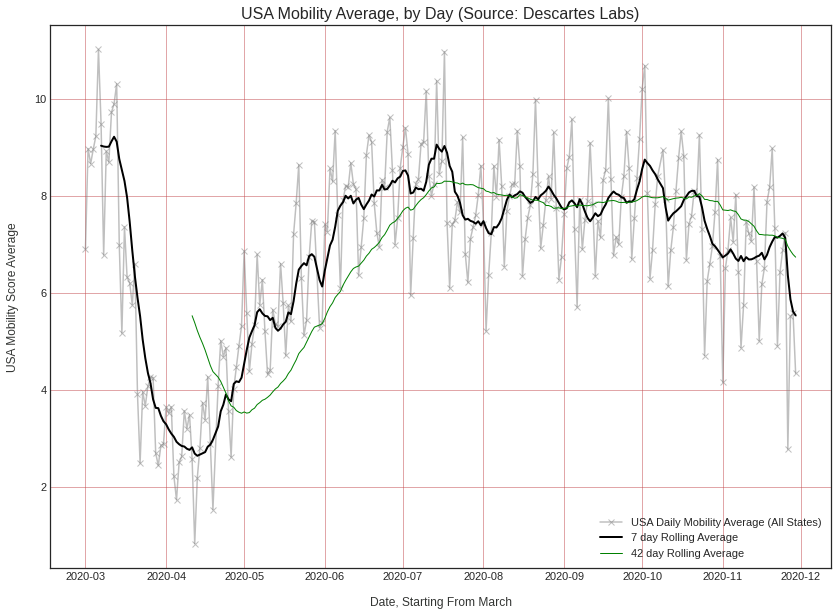

In [130]:
#EDA Basic Plotting for Cases by Date
date = agg_df3['date']
mobility_agg = agg_df3['Mobility Score']

fig, ax = plt.subplots(figsize = (14,10))

ax.plot(date, mobility_agg , '-x', alpha = .5, color = 'gray', label = "USA Daily Mobility Average (All States)")
ax.plot(date, mobility_agg.rolling(7).mean(), '-', linewidth = 2, color = 'black', label = "7 day Rolling Average")
ax.plot(date, mobility_agg.rolling(42).mean(), '-', linewidth = 1, color = 'green', label = "42 day Rolling Average")

ax.set_title(f"USA Mobility Average, by Day (Source: Descartes Labs)", fontsize = 16)
ax.grid(which = 'both', color='r', linestyle='-', linewidth=.5)
ax.legend()
ax.set_xlabel("Date, Starting From March", labelpad=15, fontsize=12, color="#333533");
ax.set_ylabel(f"USA Mobility Score Average", labelpad=15, fontsize=12, color="#333533")

## Conclusion: Somewhat positive
What is good about these numbers is that, overall, entering the winter, social distancing/lack of travel has increased after November. Despite Thanksgiving travels, hopefully we will not see any huge upshoot in numbers